In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def face_dt(image_path):
    model_weight1 = 'yolov3-wider_16000.weights'
    model_cfg1 = 'yolov3-face.cfg'
    net1 = cv2.dnn.readNet(model_weight1,model_cfg1)
    layers_names = net1.getLayerNames()
    output_layers = [layers_names[i[0] -1] for i in net1.getUnconnectedOutLayers()]
    #colors = np.random.uniform(0, 255, size = (len(classes), 3))
    # Loading image
    img = cv2.imread(image_path)
    height, width, channels = img.shape
    img = cv2.resize(img, (width, height), None)
    height, width, channels = img.shape
    # Detect image
    blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0, 0, 0), True, crop = False)

    net1.setInput(blob)
    outs = net1.forward(output_layers)
    class_ids = []
    confidences = []
    boxes = []
    conf_avg =0
    for out in outs:
        #face = 0
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                #Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y -h / 2)
                #cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0))

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                # Name of the object
                class_ids.append(class_id)
                #face = face + 1
                conf_avg = (sum(confidences)/len(confidences))
  
    face = len(class_ids)
    #print(face)
    #print(conf_avg)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)
    font = cv2.FONT_HERSHEY_SIMPLEX
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            text = "{:.2f}%".format(confidences[i] * 100)
            color = (55, 255, 155)
            img[y:y+h,x:x+w] = cv2.GaussianBlur(img[y:y+h,x:x+w],(15,15),cv2.BORDER_DEFAULT)
            cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
            cv2.putText(img, text, (x,y-5), font, 0.5, color, 1)

    #plt.imshow(img)
    #cv2.imshow("Image", img)
    #cv2.imwrite( "Face1.jpg", img);
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    return img,face,conf_avg

In [9]:
def plate_dt(img):
    modelConfiguration = "yolov4-obj-license.cfg"
    modelWeights = "custom_license.weights"
    classesFile = "obj-license.names"
    classes = None
    with open(classesFile, 'rt') as f:
        classes = f.read().rstrip('\n').split('\n')
    net2 = cv2.dnn.readNet(modelConfiguration, modelWeights)
    #net2.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
    #net2.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)
    layers_names1 = net2.getLayerNames()
    output_layers1 = [layers_names1[i[0] -1] for i in net2.getUnconnectedOutLayers()]
    colors = np.random.uniform(0, 255, size = (len(classes), 3))
    # Loading image
    #img = cv2.imread('image/car_4.jpg')
    height, width, channels = img.shape
    img = cv2.resize(img, (width, height), None)
    #height, width, channels = img.shape
    # Detect image
    blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0, 0, 0), True, crop = False)
    #blob = cv2.dnn.blobFromImage(img, 1/255, (width, height), [0,0,0], 1, crop=False)

    net2.setInput(blob)
    outs = net2.forward(output_layers1)
    class_ids = []
    confidences = []
    boxes = []
    conf_avg =0
    for out in outs:
        #count = 0
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                #Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y -h / 2)
                #cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0))

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                # Name of the object
                class_ids.append(class_id)
                #count = count+1
                conf_avg = (sum(confidences)/len(confidences))
    count = len(class_ids)
    #print(count)
    #print(conf_avg)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)
    font = cv2.FONT_HERSHEY_SIMPLEX
    plate = 0
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label =  "{}".format(classes[class_ids[i]])
            #label = "{}: {:.2f}%".format(classes[class_ids[i]], confidences[i]*100)
            text = "{:.2f}%".format(confidences[i]*100)
            if 'plate' in label:
                plate = plate + 1
            #print(label)
            #color = colors[i]
            img[y:y+h,x:x+w] = cv2.GaussianBlur(img[y:y+h,x:x+w],(15,15),cv2.BORDER_DEFAULT)
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
            cv2.putText(img, label, (x,y-5), font, 0.5, (255,0,0), 1)


    #plt.imshow(img)
    #cv2.imwrite( "/Users/st00853/DeepDeterministicPG/DeepLearning_torch/Opencv_detection/result2.jpg", img);
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    return img, plate ,conf_avg


In [11]:
def object_dt(image_path):
    model_weight = 'yolov4.weights'
    model_cfg = 'yolov4.cfg'
    net = cv2.dnn.readNet(model_weight,model_cfg)
    classes = []
    with open("coco.names", "r") as f:
        classes = [line.strip() for line in f.readlines()] 
    layers_names = net.getLayerNames()
    output_layers = [layers_names[i[0] -1] for i in net.getUnconnectedOutLayers()]
    colors = np.random.uniform(0, 255, size = (len(classes), 3))
    # Loading image
    img = cv2.imread(image_path)
    height, width, channels = img.shape
    img = cv2.resize(img, (width, height), None)
    #height, width, channels = img.shape
    # Detect image
    blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0, 0, 0), True, crop = False)

    net.setInput(blob)
    outs = net.forward(output_layers)
    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    conf_avg = 0 
    for out in outs:
        #count = 0
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                #Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y -h / 2)
                #cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0))

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                # Name of the object
                class_ids.append(class_id)
                #count = count+1
                conf_avg = (sum(confidences)/len(confidences))
    count = len(class_ids)
    #print(count)
    #print(conf_avg)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)
    font = cv2.FONT_HERSHEY_SIMPLEX
    person = 0
    car = 0
    bus = 0
    truck = 0
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            #label = "{}: {:.2f}%".format(classes[class_ids[i]], confidences[i]*100)
            label =  "{}".format(classes[class_ids[i]])
            if 'person' in label:
                person = person + 1
            if 'car' in label:
                car = car + 1
            if 'bus' in label:
                bus = bus + 1
            if 'truck' in label:
                truck = truck + 1
            #print(label)
            text = "{:.2f}%".format(confidences[i]*100)
            #print(label)
            color = colors[i]
            cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
            cv2.putText(img, label, (x,y-5), font, 0.5, color, 1)
    #print(person)
    #print(car)
    #print(bus)
    #print(truck)
    #plt.imshow(img)
    #cv2.imwrite( "/Users/st00853/DeepDeterministicPG/DeepLearning_torch/Opencv_detection/result2.jpg", img);
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    return img,count,conf_avg,person,car,bus,truck


In [17]:
def Anonymize(image_path):
    img,face,conf_avg = face_dt(image_path)
    img1,count1,conf_avg1 = plate_dt(img)
    img2,count2,conf_avg2,person,car,bus,truck = object_dt(image_path)
    vehicle = car + bus + truck
    mis_face = person-face
    mis_plate = vehicle - count1
    
    return img1,face,conf_avg,count1,conf_avg1,conf_avg2,person,vehicle,mis_face,mis_plate
    
    

In [18]:
image_path = 'image/car_4.jpg'

Number of faces: 0
conf of faces: 0
Number of plates: 2
conf of plates: 0.8952308371663094
Number of person: 3
Number of vehicles: 4
conf of object: 0.7916021056664295
Number of missed faces: 3
Number of missed num plate: 2


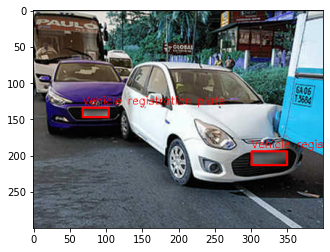

In [21]:
img1,face,conf_avg,count1,conf_avg1,conf_avg2,person,vehicle,mis_face,mis_plate = Anonymize(image_path)
print('Number of faces:', face)
print('conf of faces:', conf_avg)
print('Number of plates:', count1)
print('conf of plates:', conf_avg1)
print('Number of person:', person)
print('Number of vehicles:', vehicle)
print('conf of object:', conf_avg2)
print('Number of missed faces:', mis_face)
print('Number of missed num plate:', mis_plate)
plt.imshow(img1)

In [22]:
path = 'image'

car.jpg
Number of faces: 0
conf of faces: 0
Number of plates: 2
conf of plates: 0.6430793523788452
Number of person: 0
Number of vehicles: 0
conf of object: 0
Number of missed faces: 0
Number of missed num plate: -2
car2.jpg
Number of faces: 0
conf of faces: 0
Number of plates: 1
conf of plates: 0.6516384134689966
Number of person: 0
Number of vehicles: 1
conf of object: 0.807334691286087
Number of missed faces: 0
Number of missed num plate: 0
car3.png
Number of faces: 0
conf of faces: 0
Number of plates: 1
conf of plates: 0.5861989445984364
Number of person: 0
Number of vehicles: 1
conf of object: 0.7964248855908712
Number of missed faces: 0
Number of missed num plate: 0
cars.jpg
Number of faces: 0
conf of faces: 0
Number of plates: 2
conf of plates: 0.7857505138963461
Number of person: 0
Number of vehicles: 2
conf of object: 0.8345224459966024
Number of missed faces: 0
Number of missed num plate: 0
car_0.jpg
Number of faces: 0
conf of faces: 0
Number of plates: 1
conf of plates: 0.80

C:\Users\Dharani Prabhu N\Anaconda3\envs\mag\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


Number of faces: 33
conf of faces: 0.8998483274922227
Number of plates: 0
conf of plates: 0
Number of person: 8
Number of vehicles: 0
conf of object: 0.785412168218976
Number of missed faces: -25
Number of missed num plate: 0
groupangle.jpg
Number of faces: 33
conf of faces: 0.8606249690055847
Number of plates: 0
conf of plates: 0
Number of person: 9
Number of vehicles: 0
conf of object: 0.781556083875544
Number of missed faces: -24
Number of missed num plate: 0
groupbig.jpg
Number of faces: 20
conf of faces: 0.8613091140985489
Number of plates: 0
conf of plates: 0
Number of person: 3
Number of vehicles: 0
conf of object: 0.6548651332656542
Number of missed faces: -17
Number of missed num plate: 0
images10.jpg
Number of faces: 2
conf of faces: 0.6895301043987274
Number of plates: 0
conf of plates: 0
Number of person: 7
Number of vehicles: 4
conf of object: 0.7550172747837173
Number of missed faces: 5
Number of missed num plate: 4
images11.jpg
Number of faces: 1
conf of faces: 0.5607617

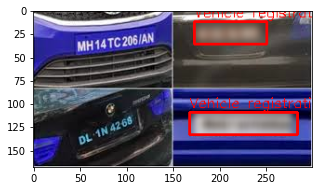

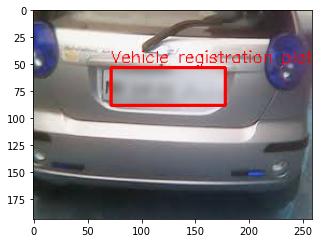

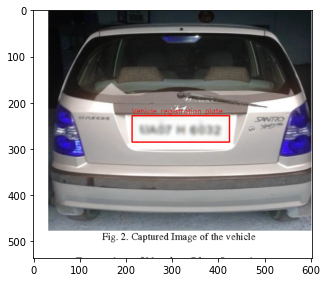

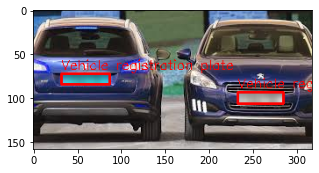

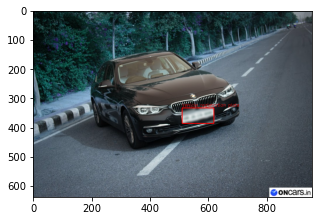

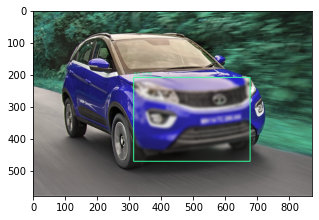

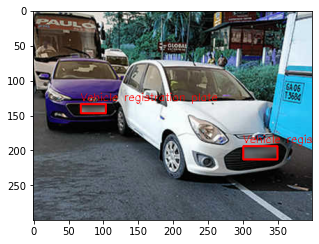

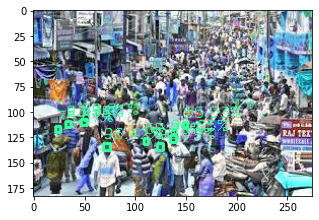

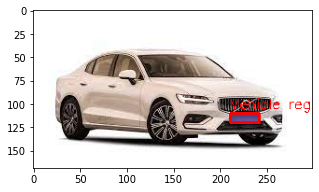

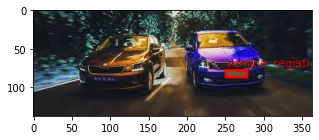

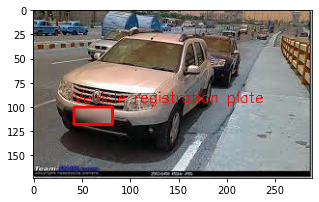

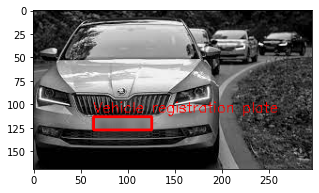

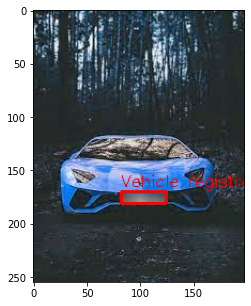

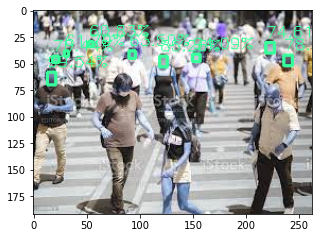

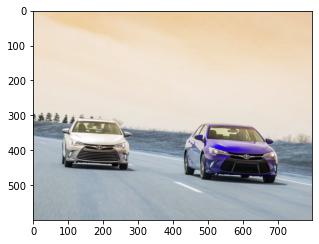

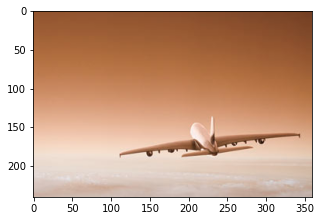

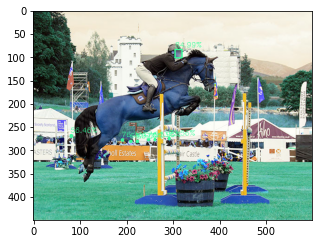

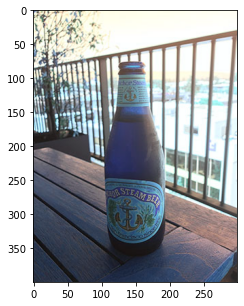

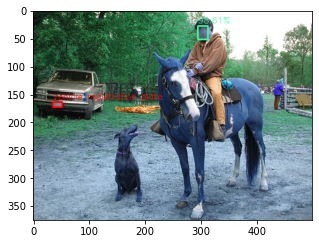

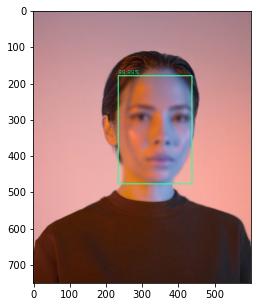

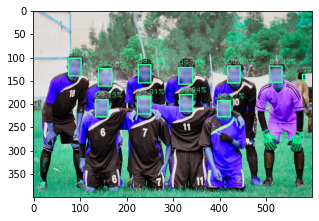

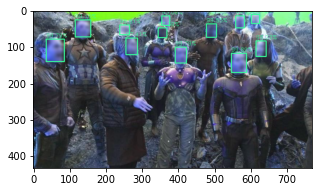

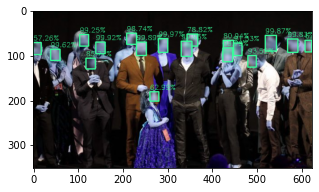

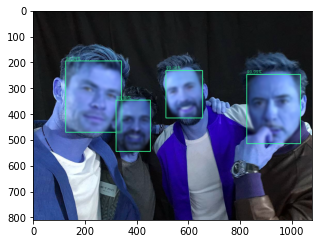

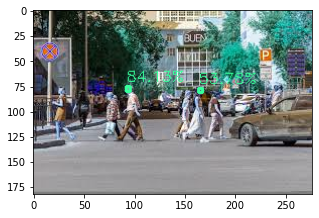

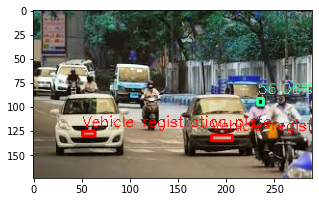

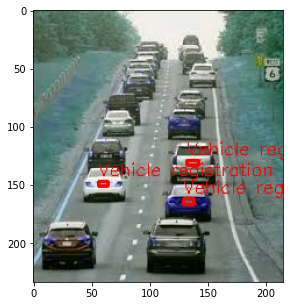

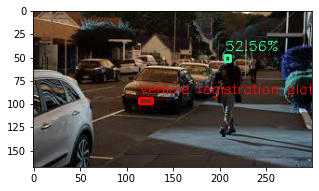

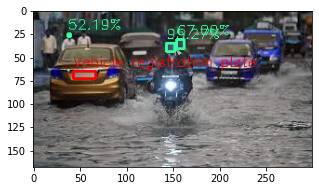

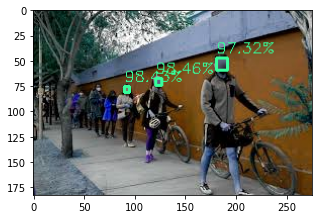

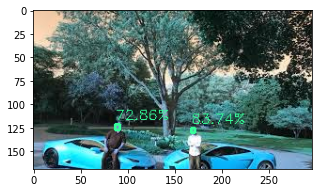

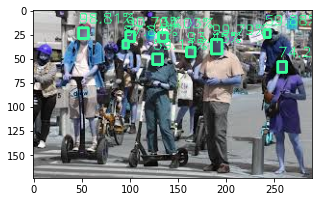

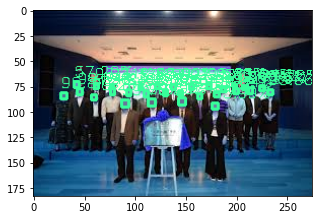

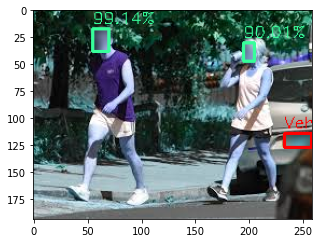

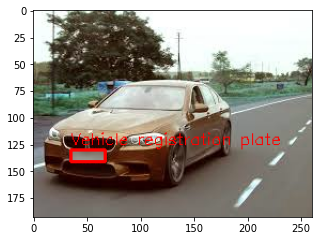

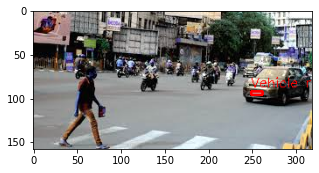

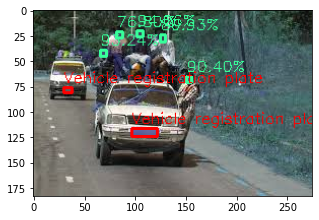

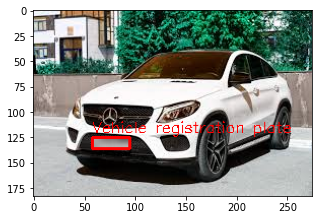

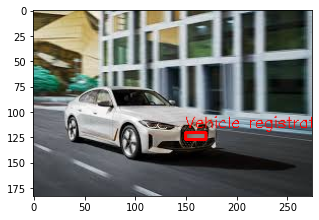

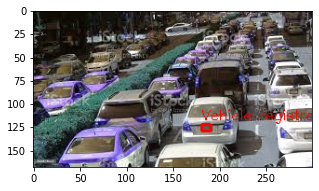

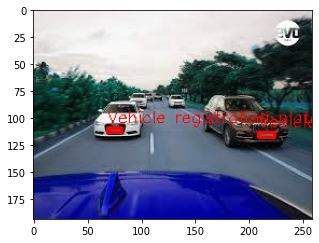

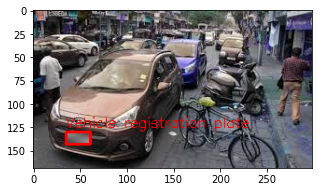

In [25]:
for image in os.listdir(path):
    print(image)
    input_path = os.path.join(path, image)
    #print(input_path)
    img1,face,conf_avg,count1,conf_avg1,conf_avg2,person,vehicle,mis_face,mis_plate = Anonymize(input_path)
    print('Number of faces:', face)
    print('conf of faces:', conf_avg)
    print('Number of plates:', count1)
    print('conf of plates:', conf_avg1)
    print('Number of person:', person)
    print('Number of vehicles:', vehicle)
    print('conf of object:', conf_avg2)
    print('Number of missed faces:', mis_face)
    print('Number of missed num plate:', mis_plate)
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(img1)